In [1]:
import geopandas as gpd

china_path = "H:\\Region\\GAMD_410\\China_corr\\GAMD_410_China.gpkg"
china = gpd.read_file(china_path)
china

,UID,GID_0,NAME_0,VARNAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,ISO_1,HASC_1,...,ENGTYPE_5,GOVERNEDBY,SOVEREIGN,DISPUTEDBY,REGION,VARREGION,COUNTRY,CONTINENT,SUBCONT,geometry
0,42436,CHN,China,,CHN.1_1,Anhui,Ānhuī,安徽|安徽,CN-AH,CN.AH,...,,,China,,,,China,Asia,,"MULTIPOLYGON (((117.01215 30.49605, 117.00874 ..."
1,42437,CHN,China,,CHN.1_1,Anhui,Ānhuī,安徽|安徽,CN-AH,CN.AH,...,,,China,,,,China,Asia,,"MULTIPOLYGON (((117.04400 30.66469, 117.04181 ..."
2,42438,CHN,China,,CHN.1_1,Anhui,Ānhuī,安徽|安徽,CN-AH,CN.AH,...,,,China,,,,China,Asia,,"MULTIPOLYGON (((116.76235 30.82385, 116.75951 ..."
3,42439,CHN,China,,CHN.1_1,Anhui,Ānhuī,安徽|安徽,CN-AH,CN.AH,...,,,China,,,,China,Asia,,"MULTIPOLYGON (((115.93915 30.42734, 115.94868 ..."
4,42440,CHN,China,,CHN.1_1,Anhui,Ānhuī,安徽|安徽,CN-AH,CN.AH,...,,,China,,,,China,Asia,,"MULTIPOLYGON (((116.47166 30.45662, 116.47373 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2453,311319,TWN,Taiwan,,TWN.7_1,Taiwan,,台灣,,TW.TA,...,,,Taiwan,China,,,Taiwan,Asia,,"MULTIPOLYGON (((116.71722 20.70959, 116.71778 ..."
2454,311320,TWN,Taiwan,,TWN.7_1,Taiwan,,台灣,,TW.TA,...,,,Taiwan,China,,,Taiwan,Asia,,"MULTIPOLYGON (((121.61347 21.95542, 121.61347 ..."
2455,311321,TWN,Taiwan,,TWN.7_1,Taiwan,,台灣,,TW.TA,...,,,Taiwan,China,,,Taiwan,Asia,,"MULTIPOLYGON (((121.28486 25.11764, 121.28755 ..."
2456,311322,TWN,Taiwan,,TWN.7_1,Taiwan,,台灣,,TW.TA,...,,,Taiwan,China,,,Taiwan,Asia,,"MULTIPOLYGON (((121.95208 24.85097, 121.95208 ..."


In [2]:
from shapely.geometry import Point
test = Point(113.9, 22.9)

china[china["geometry"].contains(test)]

,UID,GID_0,NAME_0,VARNAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,ISO_1,HASC_1,...,ENGTYPE_5,GOVERNEDBY,SOVEREIGN,DISPUTEDBY,REGION,VARREGION,COUNTRY,CONTINENT,SUBCONT,geometry
271,42707,CHN,China,,CHN.6_1,Guangdong,Guǎngdōng,廣東|广东,CN-GD,CN.GD,...,,,China,,,,China,Asia,,"MULTIPOLYGON (((114.12109 23.05014, 114.12822 ..."


In [3]:
china[china["geometry"].contains(test)].shape

(1, 53)

In [4]:
china[china["geometry"].contains(Point(40.0, 0.0))].shape

(0, 53)

In [5]:
import numpy as np

longitude = np.linspace(-179.5, 179.5, 360)
latitude = np.linspace(-89.5,89.5,180)
lon, lat = np.meshgrid(longitude, latitude)

lon

array([[-179.5, -178.5, -177.5, ...,  177.5,  178.5,  179.5],
       [-179.5, -178.5, -177.5, ...,  177.5,  178.5,  179.5],
       [-179.5, -178.5, -177.5, ...,  177.5,  178.5,  179.5],
       ...,
       [-179.5, -178.5, -177.5, ...,  177.5,  178.5,  179.5],
       [-179.5, -178.5, -177.5, ...,  177.5,  178.5,  179.5],
       [-179.5, -178.5, -177.5, ...,  177.5,  178.5,  179.5]])

In [6]:
lat

array([[-89.5, -89.5, -89.5, ..., -89.5, -89.5, -89.5],
       [-88.5, -88.5, -88.5, ..., -88.5, -88.5, -88.5],
       [-87.5, -87.5, -87.5, ..., -87.5, -87.5, -87.5],
       ...,
       [ 87.5,  87.5,  87.5, ...,  87.5,  87.5,  87.5],
       [ 88.5,  88.5,  88.5, ...,  88.5,  88.5,  88.5],
       [ 89.5,  89.5,  89.5, ...,  89.5,  89.5,  89.5]])

In [7]:
china_grid = np.zeros((180, 360), dtype=bool)
china_grid

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [8]:
for i in range(180):
    for j in range(360):
        point = Point(lon[i, j], lat[i, j])
        if china[china["geometry"].contains(point)].shape[0]:
            china_grid[i, j] = True

china_grid

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

plt.rcParams['font.sans-serif']=['SimHei']  # 中文
plt.rcParams['axes.unicode_minus']=False    # 负号

C:\Users\alzio\AppData\Local\Temp\ipykernel_19768\561178066.py:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mapPlot = Map.pcolor(x, y, china_grid.astype(np.float), cmap='viridis', vmin=0.0, vmax=1.0)
C:\Users\alzio\AppData\Local\Temp\ipykernel_19768\561178066.py:13: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  mapPlot.cmap.set_under('w')  # 设置底色


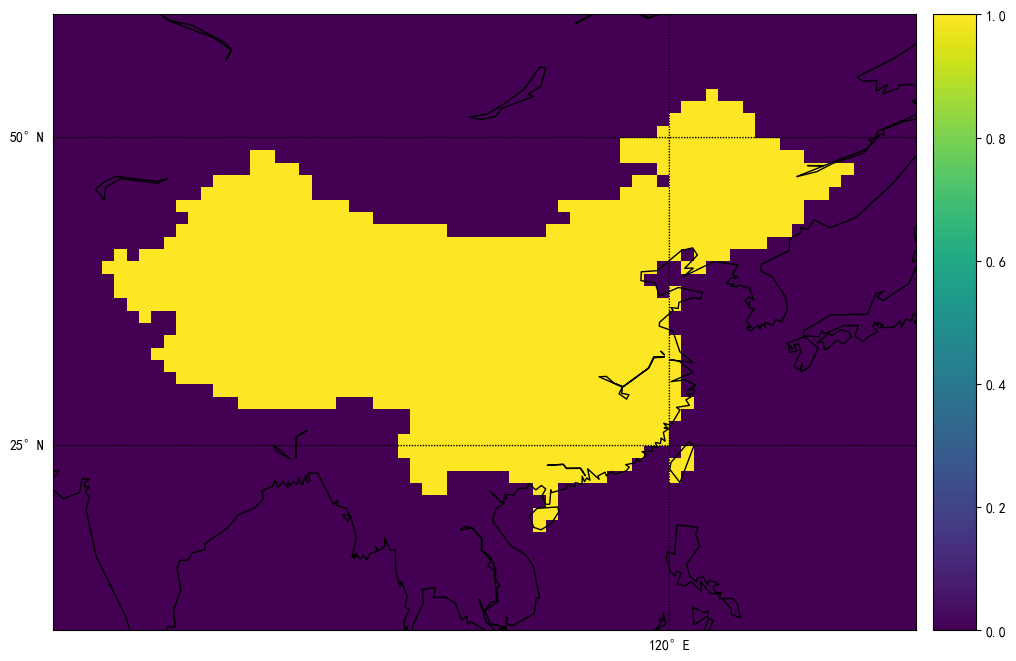

In [11]:
plt.rcParams['figure.figsize'] = (12.0, 8.0)
Map = Basemap(llcrnrlon=70., llcrnrlat=10., urcrnrlon=140., urcrnrlat=60.)
Map.drawcoastlines()
parallels = np.arange(-75.,76,25.)
# labels = [left,right,top,bottom]
Map.drawparallels(parallels,labels=[True,False,False,False])
meridians = np.arange(0.,361.,60.)
Map.drawmeridians(meridians,labels=[False,False,False,True])

x, y = Map(lon, lat)

mapPlot = Map.pcolor(x, y, china_grid.astype(np.float), cmap='viridis', vmin=0.0, vmax=1.0)
mapPlot.cmap.set_under('w')  # 设置底色
cbar=Map.colorbar(mapPlot, fraction=0.023)
plt.show()

In [12]:
np.save("china.npy", china_grid)